# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [341]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [343]:
df = pd.read_csv("https://raw.githubusercontent.com/lhughey/AIML_Course/main/Project%203%20-%20Credit%20Card%20Users%20Churn%20Prediction/BankChurners.csv")


## Data Overview

- Observations
- Sanity checks

In [344]:
#check for shape
df.shape
#show first records
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [345]:
#show last records
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [346]:
#display info about data (data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [347]:
#check for missing values
df.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,0
Card_Category,0
Months_on_book,0


In [348]:
#check for duplicates
df.duplicated().sum()

0

In [349]:
#describe data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
  
  **- The total transaction amount is right translated, with the mean being $4400. Both attrited and non attrited customers have similar shaped distributions (right shifted).**
2. What is the distribution of the level of education of customers?

  **- ~40% of customers have a college degree with 35% having an advanced degree. Atrrited customers had a higher education level on average than current customers.**

3. What is the distribution of the level of income of customers?

  **There is a coorelation between income level and attrition, with those making 40k or less being the likely to attrite.**

4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?

  **Attrited customers have lower transaction counts between Q4 and Q1. This signals that inactive customers are much more likely to attrite.**

5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?

  **Customers who were inactive for 3 months in the last 12 months were most likely to attrite. After a about 5months of inactivity, the likelihood of attrition decreases significantly.**

6. What are the attributes that have a strong correlation with each other?
  
  **Total transaction amount and total transaction count are the highest correlated with a correlation of 0.81. Months on book customer age are the second highest correlated attributes with a correlation of 0.79. Finally, average utilization ratio and total revolving balance are the third highest correlated attributes with a correlation of 0.63.**



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [350]:
#delete CLIENTNUM, as it a uniqueID
df.drop('CLIENTNUM',axis=1,inplace=True)
data = df.copy()

In [351]:
#inspect the attrition values
data['Attrition_Flag'].value_counts()
data['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1}, inplace=True)

In [352]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [353]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [354]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.figure(figsize=(10, 6))
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

def stacked_barplot_controlled_size(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    # Print the category counts
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)

    # Calculate normalized counts for the stacked bar plot
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    # Limit the figure width to a maximum of 20
    width = min(count + 1, 20)

    # Create the stacked bar plot
    tab.plot(kind="bar", stacked=True, figsize=(width, 5))

    # Adjust legend position
    plt.legend(loc="lower left", frameon=False)

    # Display the plot
    plt.show()

In [355]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(20, 13))

    target_uniq = data[target].unique()

#turn labels vertical
    plt.xticks(rotation=45, ha='right')
    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

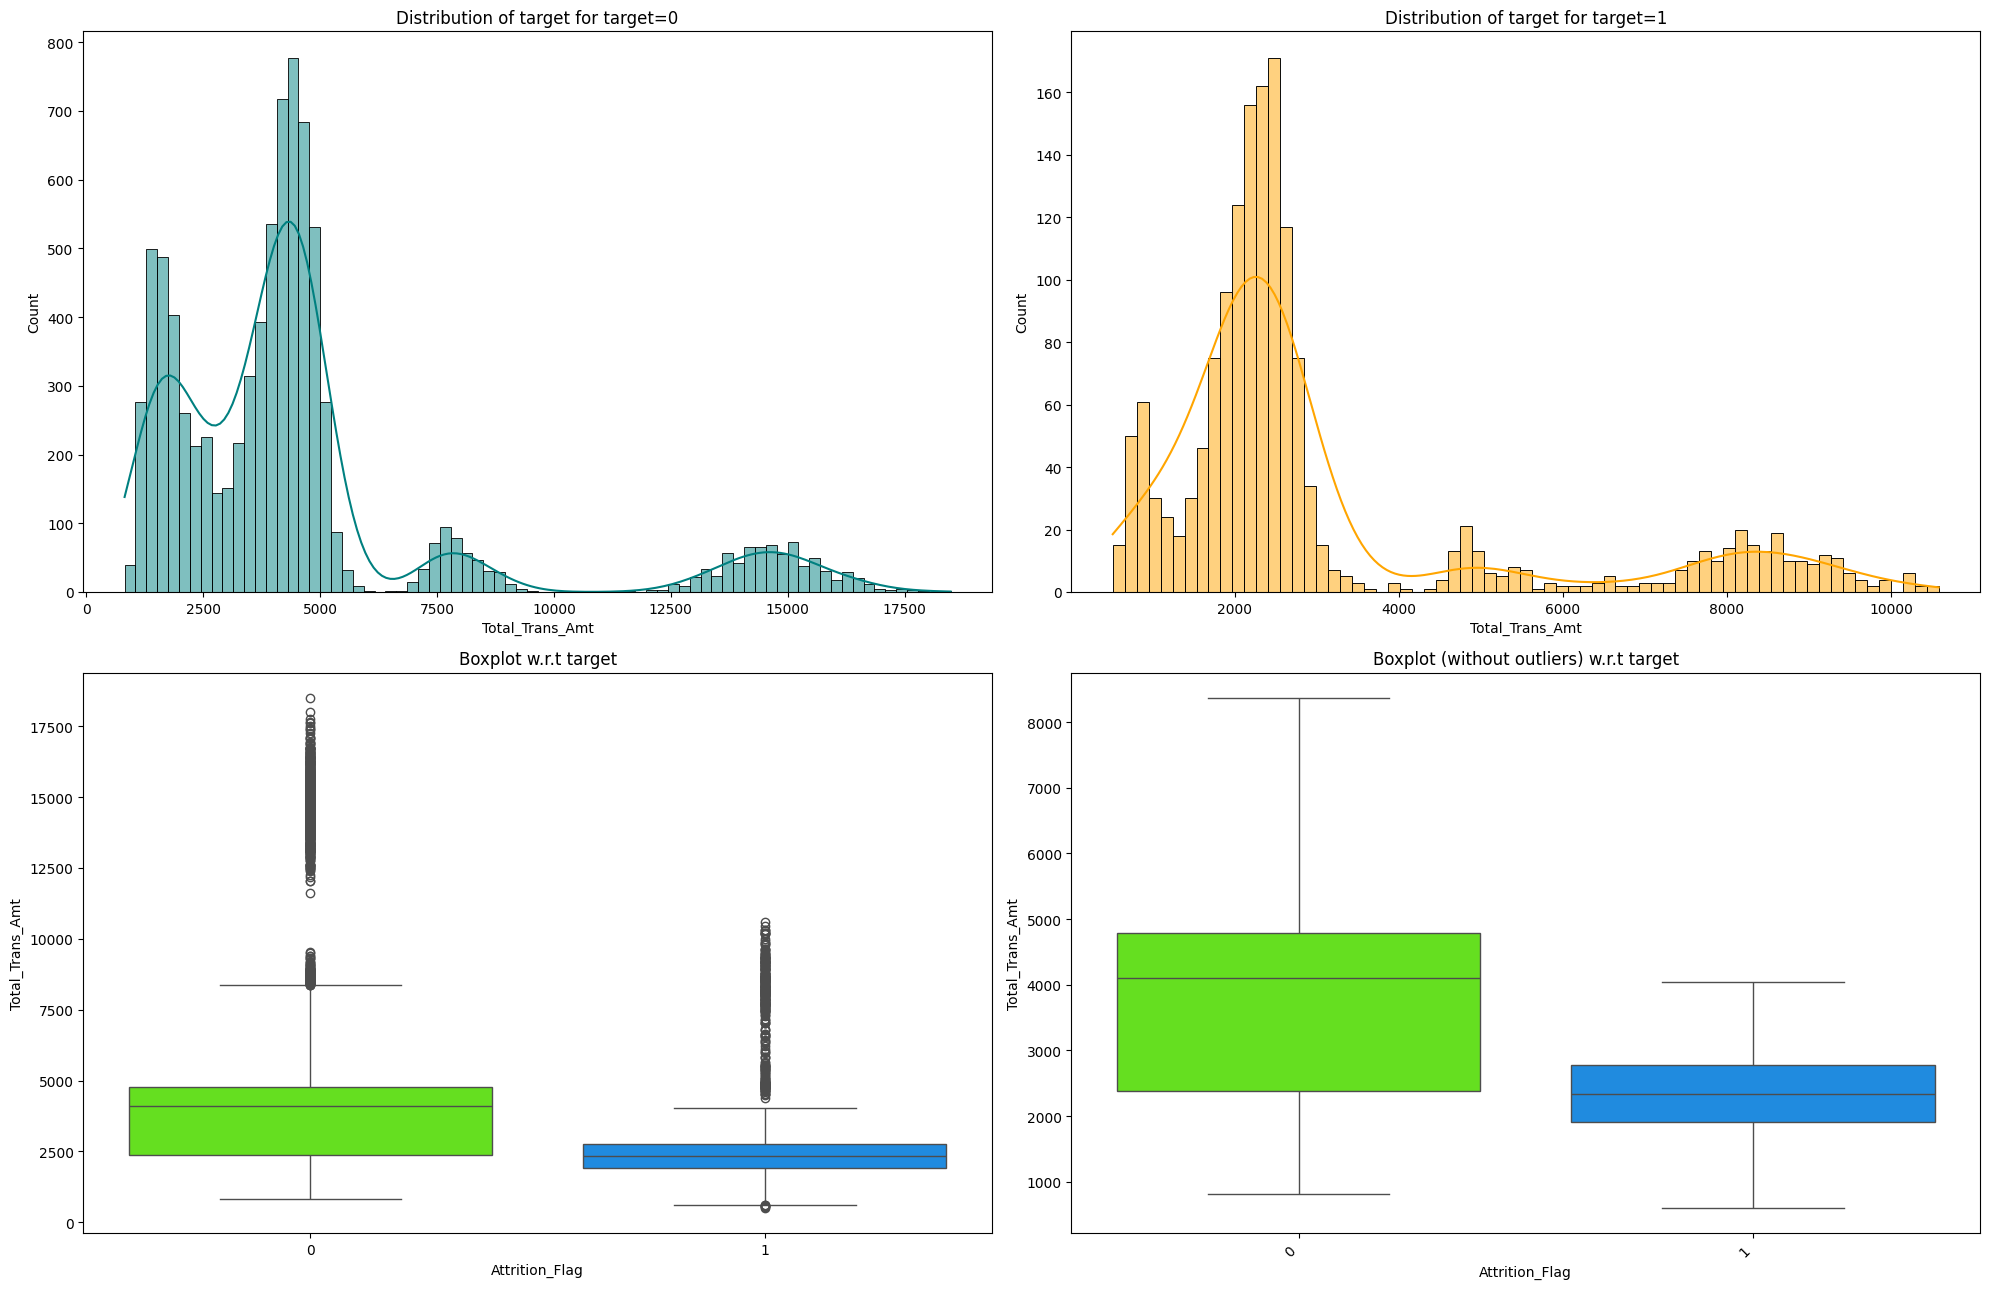

In [356]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

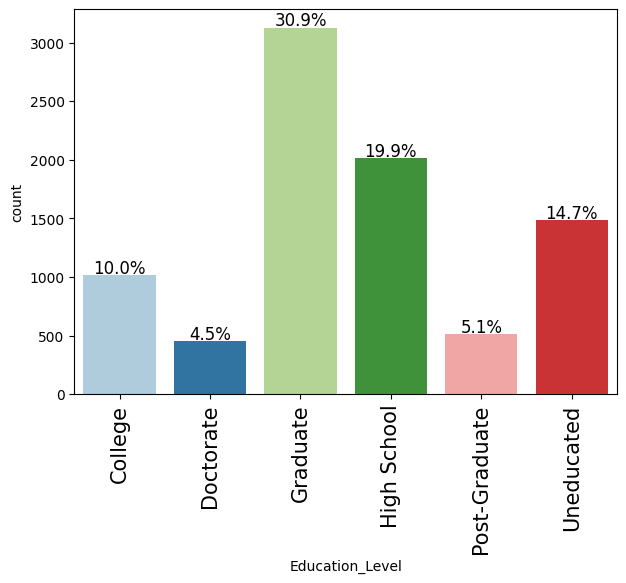

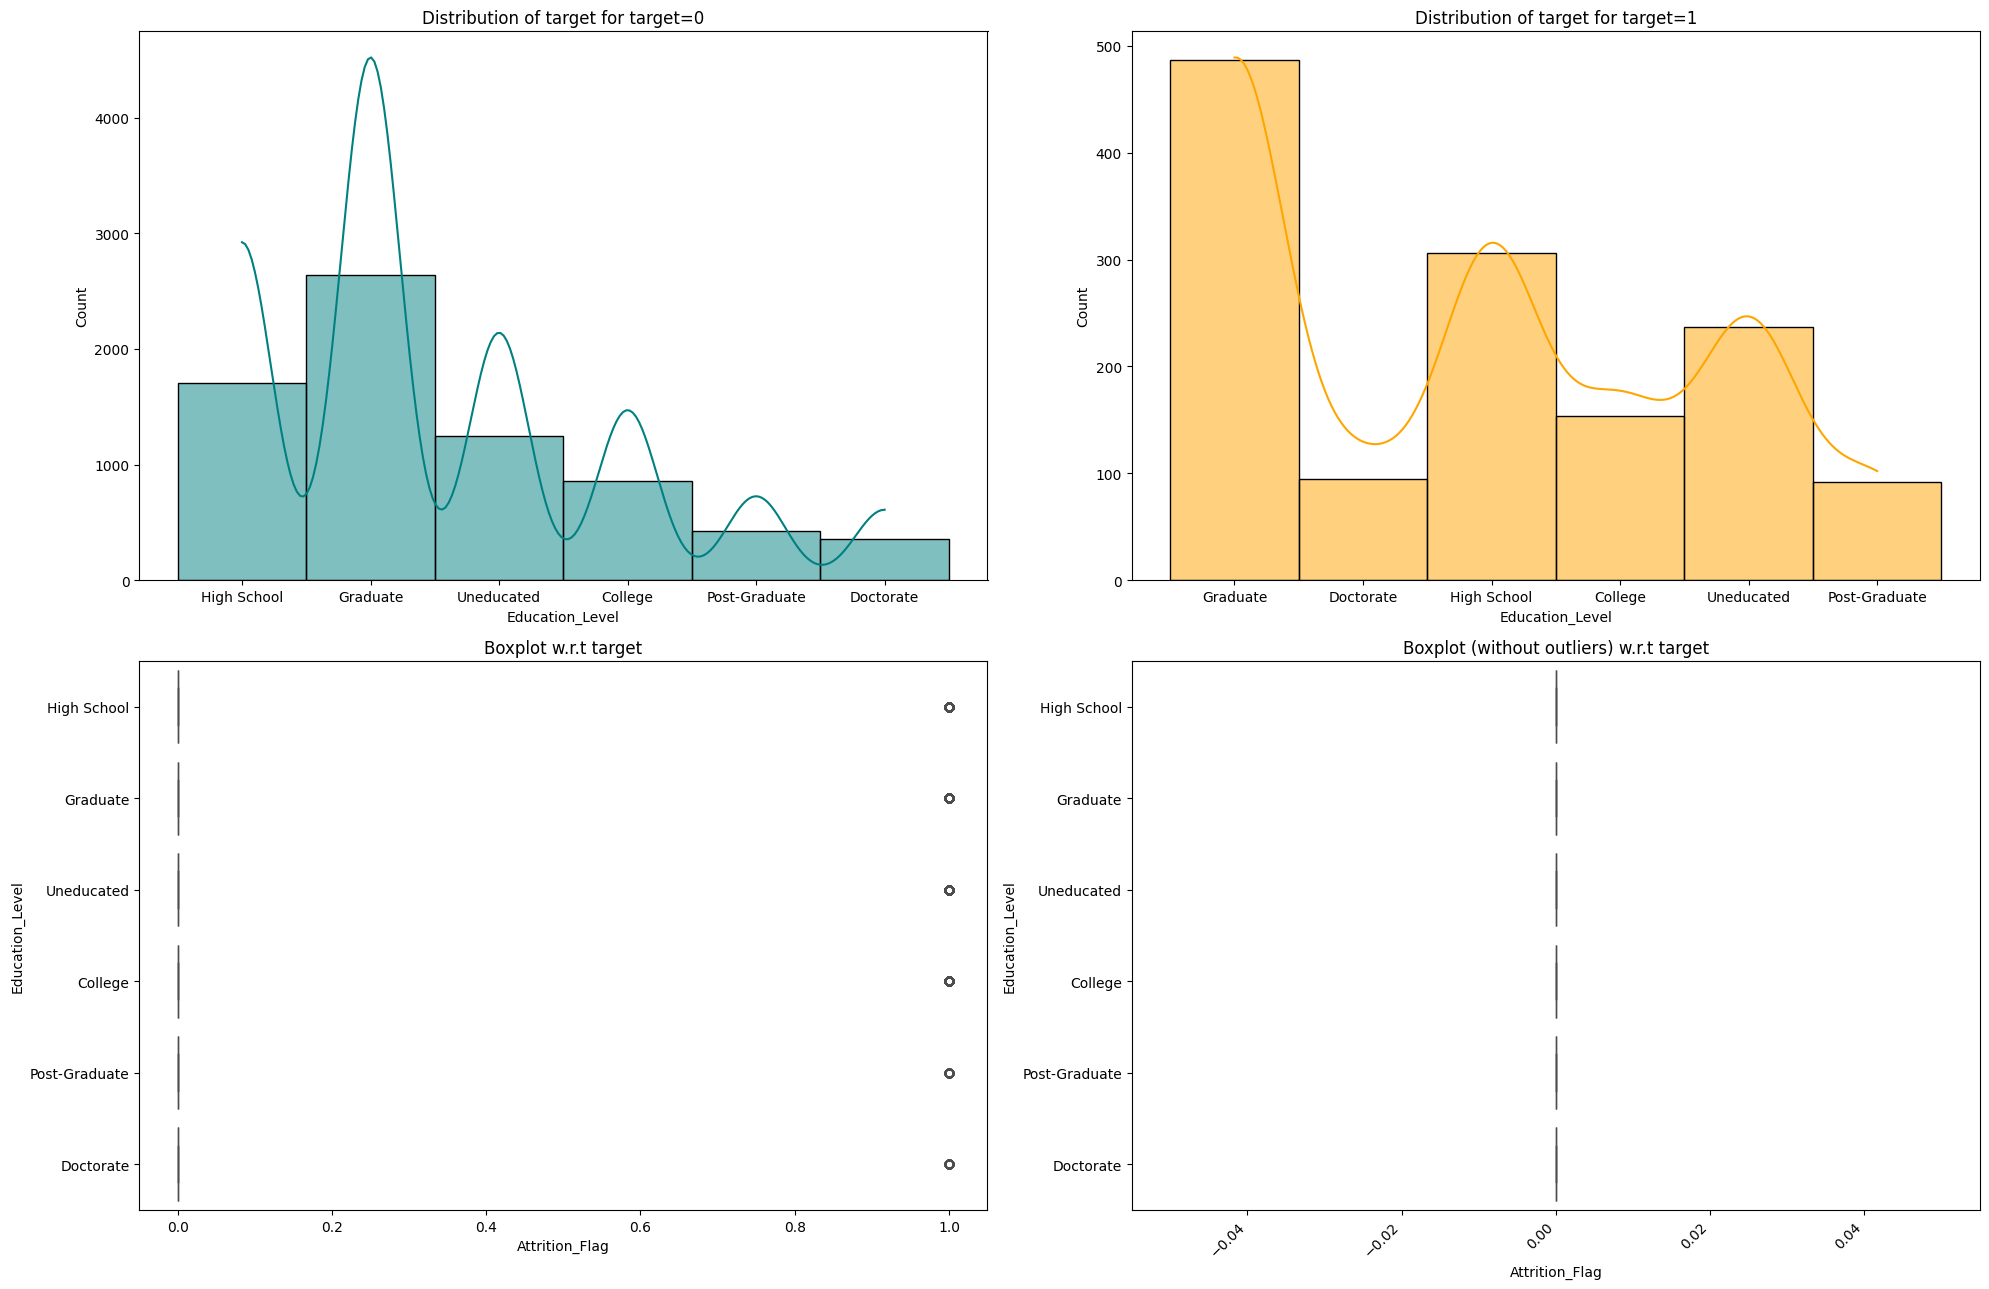

In [357]:
#distribution of education
labeled_barplot(data, "Education_Level", perc=True)
distribution_plot_wrt_target(data, "Education_Level", "Attrition_Flag")

In [358]:
#look at income category values
data['Income_Category'].value_counts()

,count
Income_Category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
abc,1112
$120K +,727


In [359]:
def redistribute_invalid_rows(df, column_name, invalid_value):
    """
    Redistribute rows from an invalid category evenly among other categories.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    column_name (str): The column name where the invalid value is located.
    invalid_value (str): The invalid value in the column to redistribute.

    Returns:
    pd.DataFrame: A new DataFrame with redistributed rows and without the invalid category.
    """
    # Calculate the counts of each category in the specified column
    counts = df[column_name].value_counts()

    # Check if the invalid value is in the column
    if invalid_value not in counts:
        print(f"Warning: '{invalid_value}' not found in column '{column_name}'. No redistribution needed.")
        return df.copy()  # Return a copy of the original DataFrame

    # Get the number of rows associated with the invalid value
    invalid_rows = counts[invalid_value]

    # Remove the invalid category from counts
    counts = counts.drop(invalid_value)

    # Calculate the number of rows to distribute to each valid category
    num_categories = len(counts)
    rows_per_category = invalid_rows // num_categories

    # Distribute the rows evenly among the valid categories
    counts += rows_per_category

    # Handle any remaining rows (if invalid_rows is not evenly divisible)
    remaining_rows = invalid_rows % num_categories
    if remaining_rows > 0:
        # Randomly select valid categories to distribute remaining rows
        random_indices = np.random.choice(counts.index, remaining_rows, replace=False)
        counts[random_indices] += 1

    # Create a new DataFrame with redistributed counts
    result_df = pd.DataFrame({
        column_name: counts.index.repeat(counts.values)
    })

    return result_df


def integrate_with_original(df, column_name, invalid_value):
    """
    Integrates the redistributed rows with the original DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    column_name (str): The column name where the invalid value is located.
    invalid_value (str): The invalid value in the column to redistribute.

    Returns:
    pd.DataFrame: The original DataFrame with redistributed rows merged.
    """
    # Get the redistributed DataFrame
    redistributed_df = redistribute_invalid_rows(df, column_name, invalid_value)

    # Remove rows with the invalid value from the original DataFrame
    df_cleaned = df[df[column_name] != invalid_value]

    # Merge the redistributed DataFrame with the cleaned original DataFrame
    merged_df = pd.concat([df_cleaned, redistributed_df], ignore_index=True)

    return merged_df


In [360]:
#remove invalid values ("abc")
#this might cause a memory issue with larger data sets, but will be fine with this size set
data_remove_invalid_income = data.copy()
data = integrate_with_original(data_remove_invalid_income, 'Income_Category', 'abc')


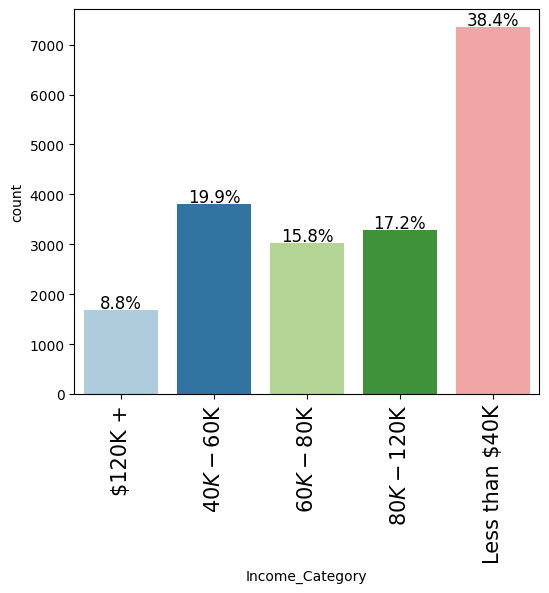

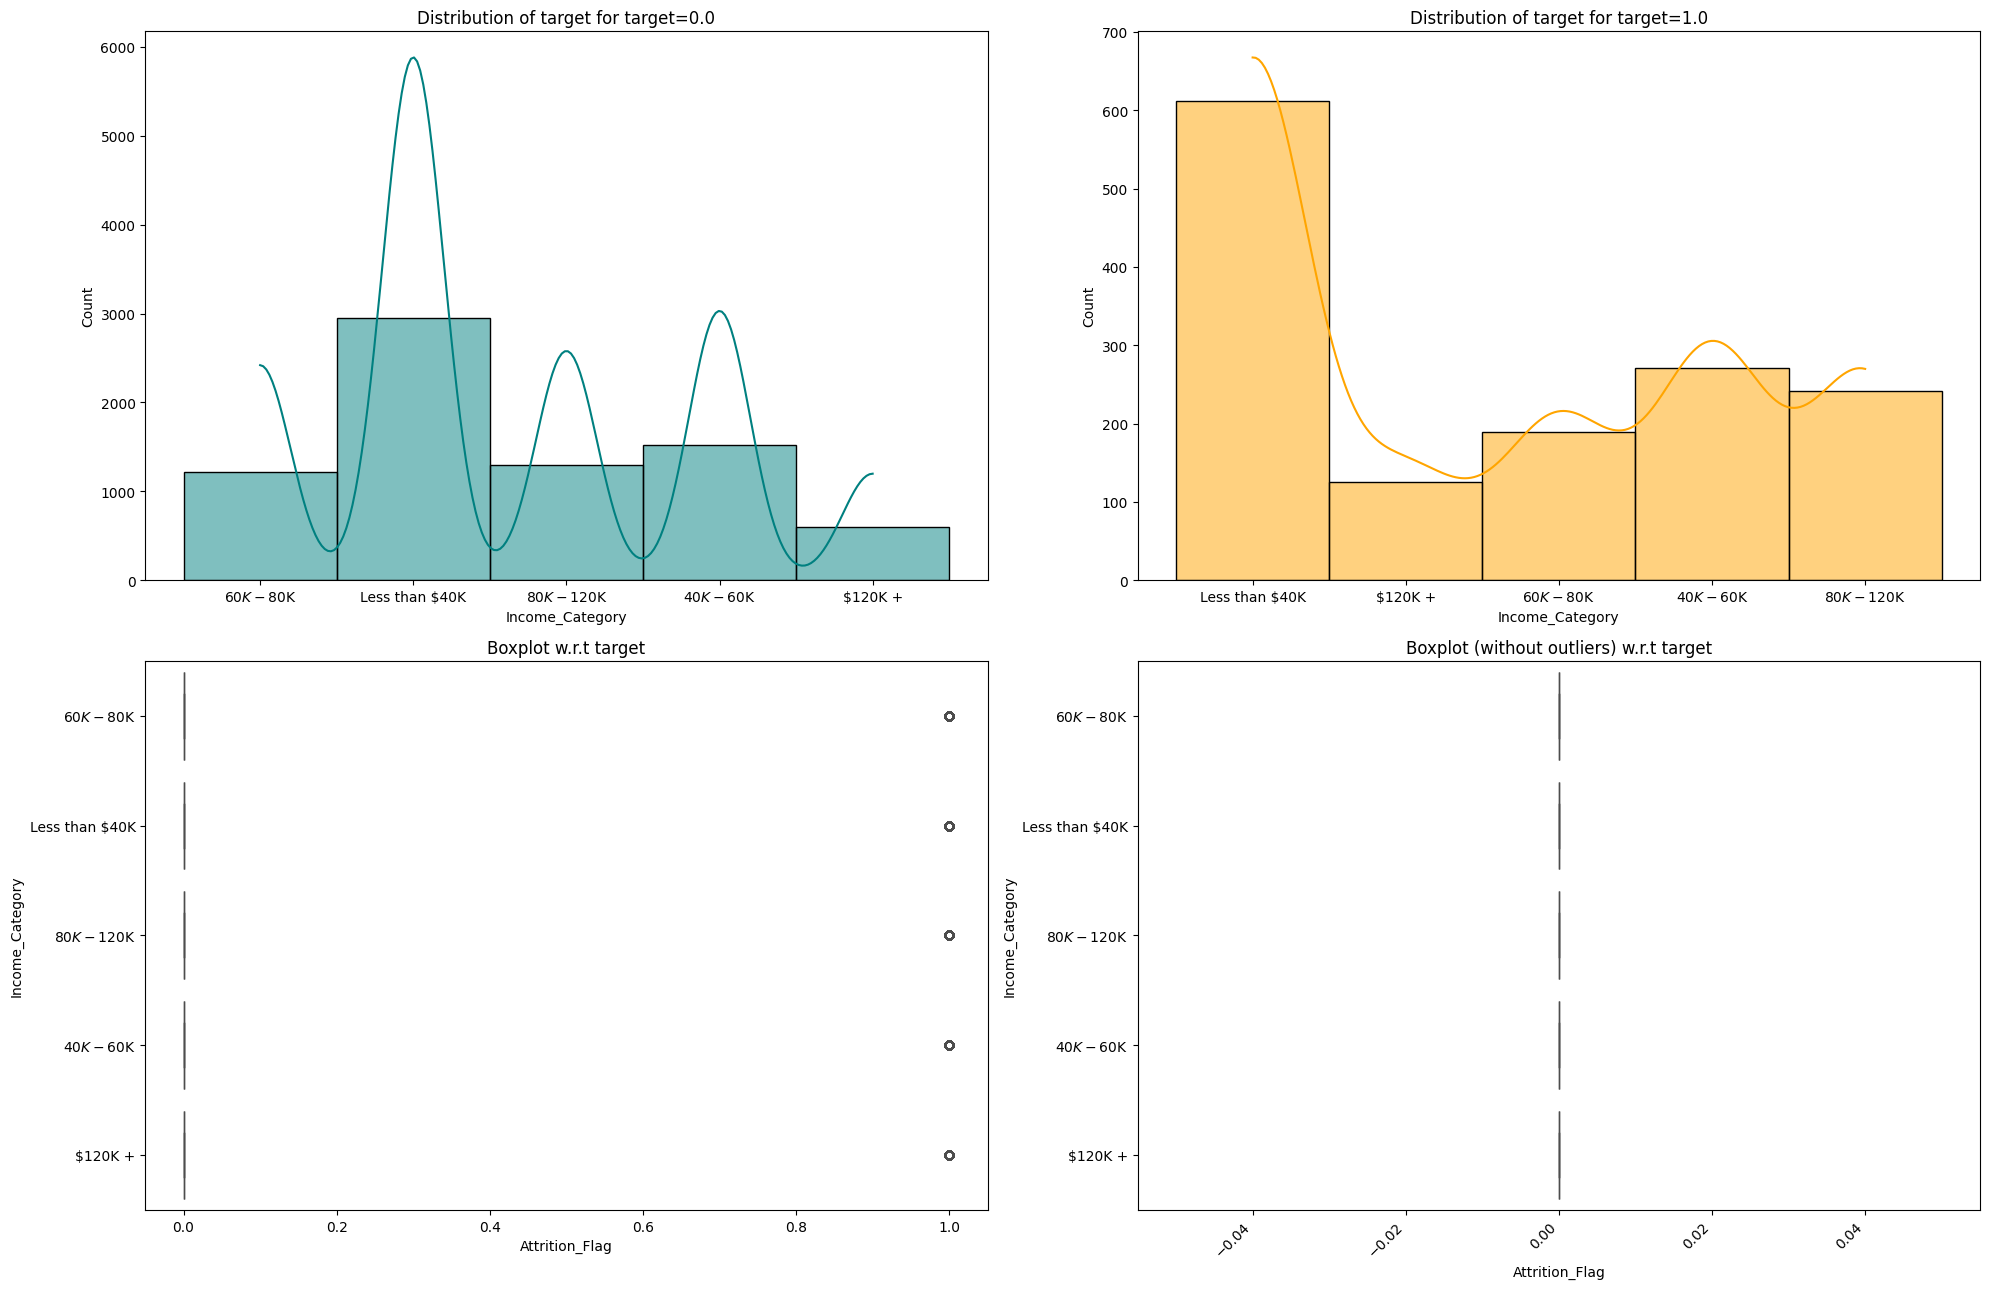

In [361]:
#chart the distribution of income level
labeled_barplot(data, "Income_Category", perc=True)

distribution_plot_wrt_target(data, "Income_Category", "Attrition_Flag")

## Data Pre-processing

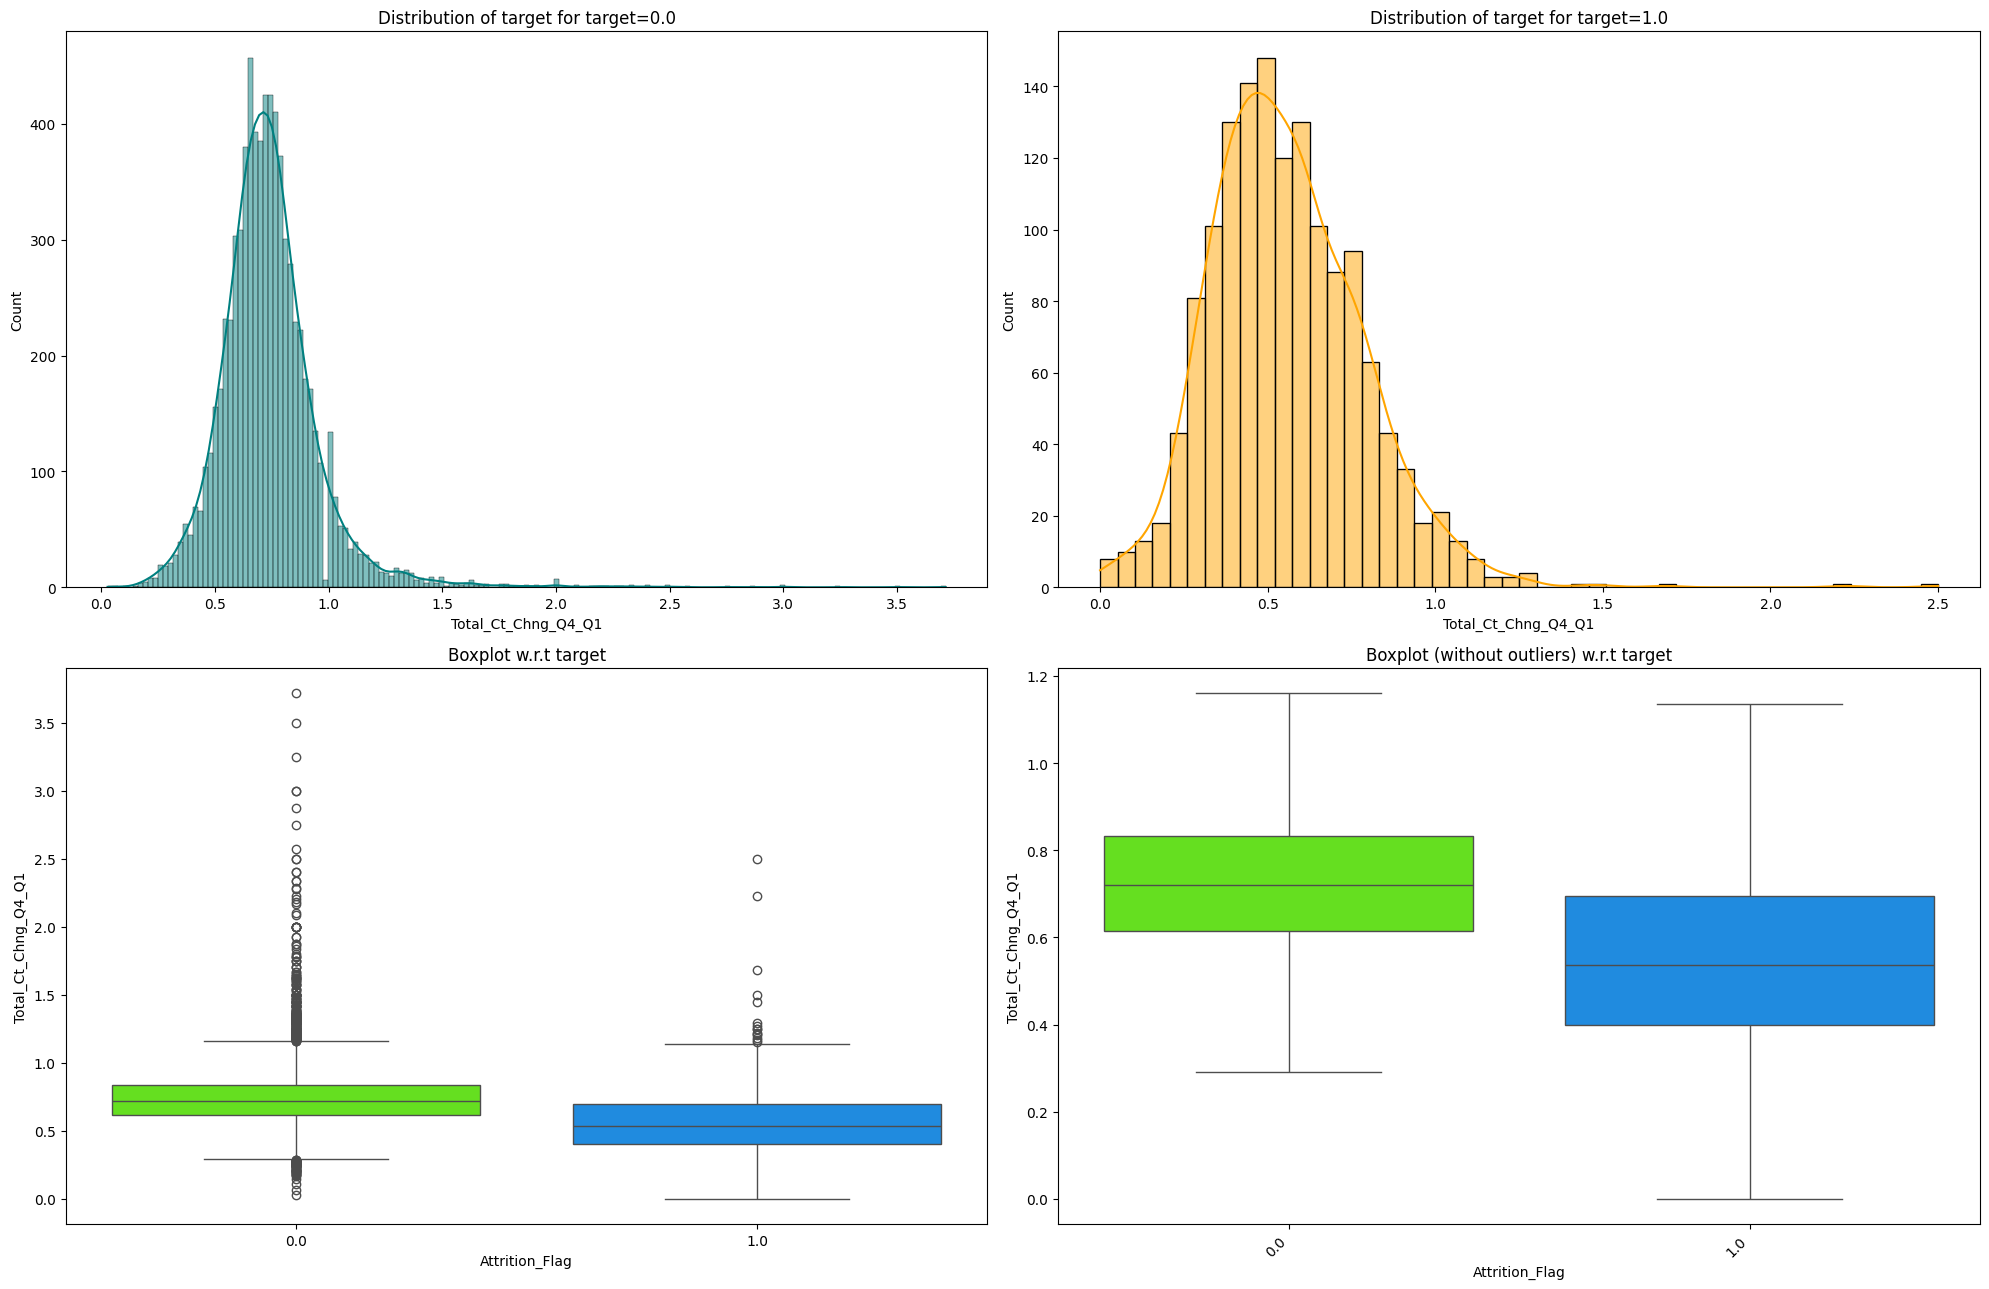

In [362]:
#evaluate Total_Ct_Chng_Q4_Q1 with target
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

There are NaN values in the 'Total_Ct_Chng_Q4_Q1' column.
Attrition_Flag               0.0   1.0   All
Total_Ct_Chng_Q4_Q1_Binned                  
All                         7575  1440  9015
(-0.00371, 0.619]           1957   930  2887
(0.619, 1.238]              5429   501  5930
(1.238, 1.857]               156     7   163
(1.857, 2.476]                23     1    24
(2.476, 3.095]                 7     1     8
(3.095, 3.714]                 3     0     3
------------------------------------------------------------------------------------------------------------------------


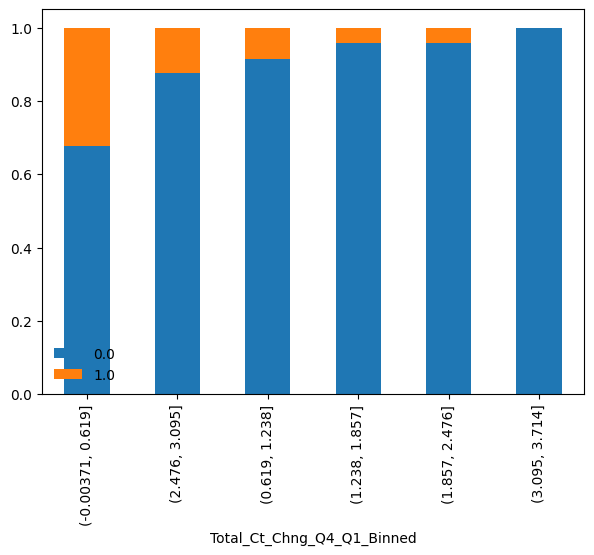

In [363]:
# #group the values of the Total_Ct_Chng_Q4_Q1
data['Total_Ct_Chng_Q4_Q1'].value_counts()

# Ensure the column is of numeric type
data['Total_Ct_Chng_Q4_Q1'] = pd.to_numeric(data['Total_Ct_Chng_Q4_Q1'], errors='coerce')

# # Check for any NaN values and handle them (if any)
if data['Total_Ct_Chng_Q4_Q1'].isnull().any():
    print("There are NaN values in the 'Total_Ct_Chng_Q4_Q1' column.")
    data['Total_Ct_Chng_Q4_Q1'].fillna(0, inplace=True)  # Example: fill NaNs with 0

# Bin the 'Total_Ct_Chng_Q4_Q1' column into 10 bins
data['Total_Ct_Chng_Q4_Q1_Binned'] = pd.cut(data['Total_Ct_Chng_Q4_Q1'], bins=6)

stacked_barplot_controlled_size(data, 'Total_Ct_Chng_Q4_Q1_Binned', 'Attrition_Flag')

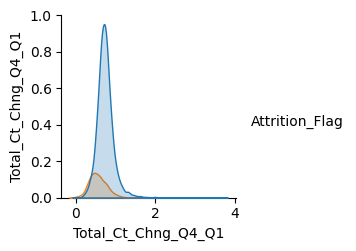

In [364]:
sns.pairplot(data, hue='Attrition_Flag', vars=['Total_Ct_Chng_Q4_Q1'])

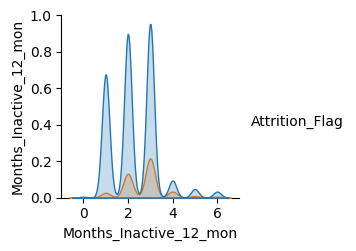

In [365]:
#pairplot the Months_Inactive_12_mon with the target
sns.pairplot(data, hue='Attrition_Flag', vars=['Months_Inactive_12_mon'])

In [366]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19142 entries, 0 to 19141
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Attrition_Flag              9015 non-null   float64 
 1   Customer_Age                9015 non-null   float64 
 2   Gender                      9015 non-null   object  
 3   Dependent_count             9015 non-null   float64 
 4   Education_Level             7641 non-null   object  
 5   Marital_Status              8348 non-null   object  
 6   Income_Category             19142 non-null  object  
 7   Card_Category               9015 non-null   object  
 8   Months_on_book              9015 non-null   float64 
 9   Total_Relationship_Count    9015 non-null   float64 
 10  Months_Inactive_12_mon      9015 non-null   float64 
 11  Contacts_Count_12_mon       9015 non-null   float64 
 12  Credit_Limit                9015 non-null   float64 
 13  Total_Revolving_

In [367]:
# Map Gender
gender = {"M": 0, "F": 1}  # Use exact values in your data
data['Gender'] = data['Gender'].map(gender)

# Map Education_Level
education = {
    "Uneducated": 0,
    "High School": 1,
    "College": 2,
    "Graduate": 3,
    "Post-Graduate": 4,
    "Doctorate": 5
}
data['Education_Level'] = data['Education_Level'].map(education)

# Map Marital_Status
marital = {"Married": 0, "Single": 1, "Divorced": 2}
data['Marital_Status'] = data['Marital_Status'].map(marital)

# Map Income_Category
income = {
    "Less than $40K": 0,
    "$40K - $60K": 1,
    "$60K - $80K": 2,  # Fix typo here ("$60K - 80k" to "$60K - $80K")
    "$80K - $120K": 3,
    "$120K +": 4
}
data['Income_Category'] = data['Income_Category'].map(income)

# Map Card_Category
card = {"Blue": 0, "Silver": 1, "Gold": 2, "Platinum": 3}
data['Card_Category'] = data['Card_Category'].map(card)

data.head()


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Ct_Chng_Q4_Q1_Binned
0,0.000,45.000,0.000,3.000,1.000,0.000,2,0.000,39.000,5.000,...,3.000,12691.000,777.000,11914.000,1.335,1144.000,42.000,1.625,0.061,"(1.238, 1.857]"
1,0.000,49.000,1.000,5.000,3.000,1.000,0,0.000,44.000,6.000,...,2.000,8256.000,864.000,7392.000,1.541,1291.000,33.000,3.714,0.105,"(3.095, 3.714]"
2,0.000,51.000,0.000,3.000,3.000,0.000,3,0.000,36.000,4.000,...,0.000,3418.000,0.000,3418.000,2.594,1887.000,20.000,2.333,0.000,"(1.857, 2.476]"
3,0.000,40.000,1.000,4.000,1.000,NaN,0,0.000,34.000,3.000,...,1.000,3313.000,2517.000,796.000,1.405,1171.000,20.000,2.333,0.760,"(1.857, 2.476]"
4,0.000,40.000,0.000,3.000,0.000,0.000,2,0.000,21.000,5.000,...,0.000,4716.000,0.000,4716.000,2.175,816.000,28.000,2.500,0.000,"(2.476, 3.095]"


In [368]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Ct_Chng_Q4_Q1_Binned
0,0.000,45.000,0.000,3.000,1.000,0.000,2,0.000,39.000,5.000,...,3.000,12691.000,777.000,11914.000,1.335,1144.000,42.000,1.625,0.061,"(1.238, 1.857]"
1,0.000,49.000,1.000,5.000,3.000,1.000,0,0.000,44.000,6.000,...,2.000,8256.000,864.000,7392.000,1.541,1291.000,33.000,3.714,0.105,"(3.095, 3.714]"
2,0.000,51.000,0.000,3.000,3.000,0.000,3,0.000,36.000,4.000,...,0.000,3418.000,0.000,3418.000,2.594,1887.000,20.000,2.333,0.000,"(1.857, 2.476]"
3,0.000,40.000,1.000,4.000,1.000,NaN,0,0.000,34.000,3.000,...,1.000,3313.000,2517.000,796.000,1.405,1171.000,20.000,2.333,0.760,"(1.857, 2.476]"
4,0.000,40.000,0.000,3.000,0.000,0.000,2,0.000,21.000,5.000,...,0.000,4716.000,0.000,4716.000,2.175,816.000,28.000,2.500,0.000,"(2.476, 3.095]"


In [369]:
# data = clean_missing_values(data)
# data.head()

In [370]:
#find Marital_status records where value isn't 1 or 0
data[~data['Marital_Status'].isin([0, 1])]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Ct_Chng_Q4_Q1_Binned
3,0.000,40.000,1.000,4.000,1.000,NaN,0,0.000,34.000,3.000,...,1.000,3313.000,2517.000,796.000,1.405,1171.000,20.000,2.333,0.760,"(1.857, 2.476]"
7,0.000,32.000,0.000,0.000,1.000,NaN,2,1.000,27.000,2.000,...,2.000,29081.000,1396.000,27685.000,2.204,1538.000,36.000,0.714,0.048,"(0.619, 1.238]"
10,0.000,42.000,0.000,5.000,0.000,NaN,4,0.000,31.000,5.000,...,2.000,6748.000,1467.000,5281.000,0.831,1201.000,42.000,0.680,0.217,"(0.619, 1.238]"
13,0.000,35.000,0.000,3.000,3.000,NaN,2,0.000,30.000,5.000,...,3.000,8547.000,1666.000,6881.000,1.163,1311.000,33.000,2.000,0.195,"(1.857, 2.476]"
15,0.000,44.000,0.000,4.000,NaN,NaN,3,0.000,37.000,5.000,...,2.000,4234.000,972.000,3262.000,1.707,1348.000,27.000,1.700,0.230,"(1.238, 1.857]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19137,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,"(-0.00371, 0.619]"
19138,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,"(-0.00371, 0.619]"
19139,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,"(-0.00371, 0.619]"
19140,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,"(-0.00371, 0.619]"


In [371]:
#check each column for NaN
data.isna().sum()

,0
Attrition_Flag,10127
Customer_Age,10127
Gender,10127
Dependent_count,10127
Education_Level,11501
Marital_Status,10794
Income_Category,0
Card_Category,10127
Months_on_book,10127
Total_Relationship_Count,10127


In [372]:
data["Income_Category"].value_counts()

,count
Income_Category,
0,7344
1,3802
3,3292
2,3027
4,1677


In [373]:
#drop category records
data = data[data["Income_Category"] != "Unknown"]


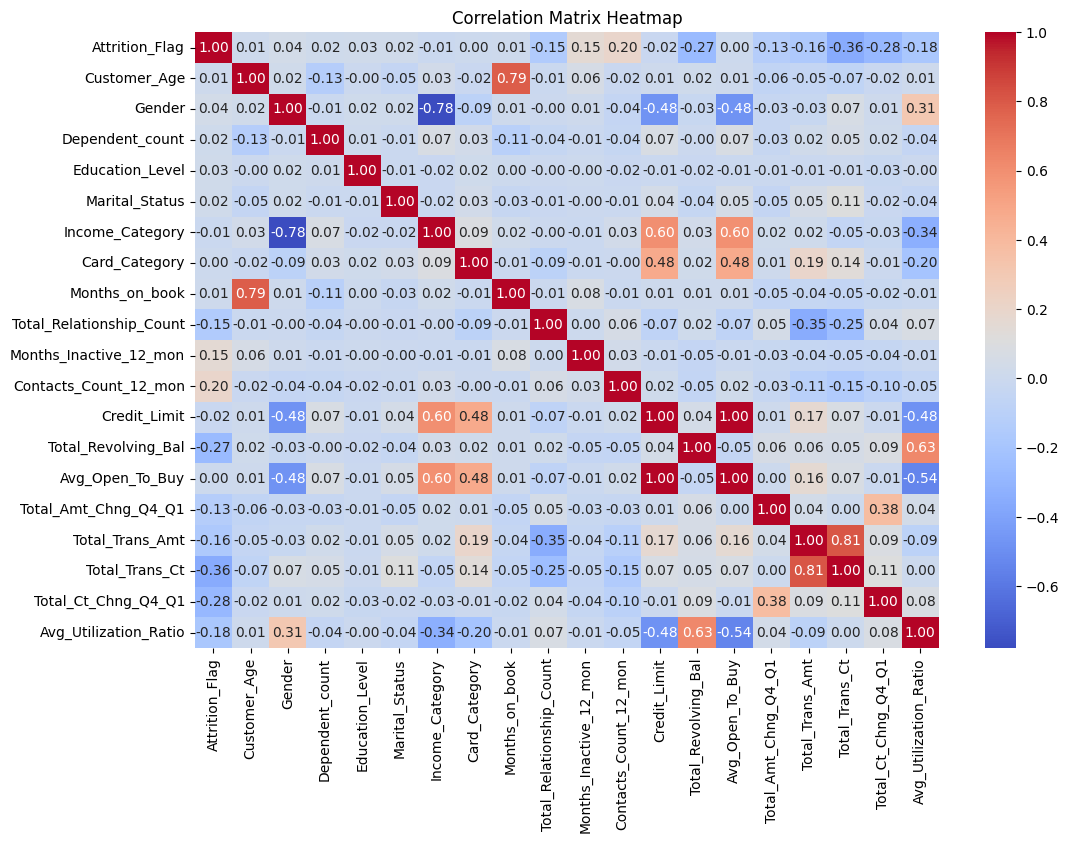

In [374]:
numeric_data = data.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Missing value imputation




In [375]:
def clean_missing_values(df):
    # Define all values that should be considered as NaN
    na_values = ['n/a', 'N/A', 'null', 'NULL', np.nan, '']

    # Replace the defined na_values with np.nan
    df.replace(na_values, np.nan, inplace=True)

    # For numeric columns, fill missing values with the mean of the column
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

    # For categorical columns, fill missing values with the most frequent value
    categorical_cols = df.select_dtypes(exclude=[np.number]).columns
    for col in categorical_cols:
        most_frequent = df[col].mode()[0]
        df[col] = df[col].fillna(most_frequent)

    return df

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [376]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Preparing data for building

Sample code for model building with original data

In [377]:
data["Attrition_Flag"].value_counts()


,count
Attrition_Flag,
0.000,7575
1.000,1440


In [387]:
#clean the attribution_flag data
# Check for NaN values in y
print(data['Attrition_Flag'].isna().sum())

# Convert all columns to numeric, forcing non-numeric values to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows where 'Attrition_Flag' is NaN
data = data.dropna(subset=['Attrition_Flag'])

#drop the binned column
data = data.drop(columns=['Total_Ct_Chng_Q4_Q1_Binned'])

0


In [388]:
#remove target data
X = data.drop("Attrition_Flag", axis=1)
y = data["Attrition_Flag"]

In [389]:
#remove rows where Marital_Status or Education_Level are null
data = data.dropna(subset=['Marital_Status', 'Education_Level'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7081 entries, 0 to 9014
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            7081 non-null   float64
 1   Customer_Age              7081 non-null   float64
 2   Gender                    7081 non-null   float64
 3   Dependent_count           7081 non-null   float64
 4   Education_Level           7081 non-null   float64
 5   Marital_Status            7081 non-null   float64
 6   Income_Category           7081 non-null   int64  
 7   Card_Category             7081 non-null   float64
 8   Months_on_book            7081 non-null   float64
 9   Total_Relationship_Count  7081 non-null   float64
 10  Months_Inactive_12_mon    7081 non-null   float64
 11  Contacts_Count_12_mon     7081 non-null   float64
 12  Credit_Limit              7081 non-null   float64
 13  Total_Revolving_Bal       7081 non-null   float64
 14  Avg_Open_To_B

In [390]:
#create tes and train data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

#split temp into validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

print(X_train.shape, X_val.shape, X_test.shape)

(4248, 19) (1416, 19) (1417, 19)


In [391]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 4248
Number of rows in validation data = 1416
Number of rows in test data = 1417


In [392]:
pd.options.mode.use_inf_as_na = True
data.isna().sum()

,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0


In [393]:
#education_level and marital_status still have null values
print(data['Education_Level'][data['Education_Level'] == ''].count())
print(data['Marital_Status'][data['Marital_Status'] == ''].count())
print(data['Education_Level'].isnull().sum())
print(data['Marital_Status'].isnull().sum())

0
0
0
0


In [394]:
!pip install pandas
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
# Get list of categorical and numerical columns
cat_cols = list(X_train.select_dtypes(include='object').columns)
num_cols = list(X_train.select_dtypes(include=['int', 'float']).columns)

# Impute categorical columns
if len(cat_cols) > 0:  # Check if there are any categorical columns
    cat_imputer = SimpleImputer(strategy='most_frequent')

    # Perform imputation and convert back to DataFrame with original column names
    X_train[cat_cols] = pd.DataFrame(cat_imputer.fit_transform(X_train[cat_cols]), columns=cat_cols, index=X_train.index)
    X_val[cat_cols] = pd.DataFrame(cat_imputer.transform(X_val[cat_cols]), columns=cat_cols, index=X_val.index)
    X_test[cat_cols] = pd.DataFrame(cat_imputer.transform(X_test[cat_cols]), columns=cat_cols, index=X_test.index)

# Impute numerical columns
num_imputer = SimpleImputer(strategy='mean')

# Perform imputation and convert back to DataFrame with original column names
X_train[num_cols] = pd.DataFrame(num_imputer.fit_transform(X_train[num_cols]), columns=num_cols, index=X_train.index)
X_val[num_cols] = pd.DataFrame(num_imputer.transform(X_val[num_cols]), columns=num_cols, index=X_val.index)
X_test[num_cols] = pd.DataFrame(num_imputer.transform(X_test[num_cols]), columns=num_cols, index=X_test.index)



In [395]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

### Model Building with original data

In [396]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9850074962518741
Random forest: 1.0
GBM: 0.9145427286356822
Adaboost: 0.8530734632683659
dtree: 1.0

Validation Performance:

Bagging: 0.7892376681614349
Random forest: 0.7802690582959642
GBM: 0.8340807174887892
Adaboost: 0.8026905829596412
dtree: 0.7713004484304933


### Evaluate Performance of models

In [397]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9850, Validation Score: 0.7892, Difference: 0.1958
Random forest: Training Score: 1.0000, Validation Score: 0.7803, Difference: 0.2197
GBM: Training Score: 0.9145, Validation Score: 0.8341, Difference: 0.0805
Adaboost: Training Score: 0.8531, Validation Score: 0.8027, Difference: 0.0504
dtree: Training Score: 1.0000, Validation Score: 0.7713, Difference: 0.2287


### Results
GBM and Adaboost performed the best out of the 5 model types

### Model Building with Oversampled data


In [398]:
#display the results before and after oversampling
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))

print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 667
Before Oversampling, counts of label 'No': 3581 

After Oversampling, counts of label 'Yes': 3581
After Oversampling, counts of label 'No': 3581 

After Oversampling, the shape of train_X: (7162, 19)
After Oversampling, the shape of train_y: (7162,) 



###Run model with Oversampled data

In [399]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9980452387601229
Random forest: 1.0
GBM: 0.9868751745322536
Adaboost: 0.9701200781904495
dtree: 1.0

Validation Performance:

Bagging: 0.8295964125560538
Random forest: 0.8071748878923767
GBM: 0.874439461883408
Adaboost: 0.8878923766816144
dtree: 0.8475336322869955


In [401]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9980, Validation Score: 0.8296, Difference: 0.1684
Random forest: Training Score: 1.0000, Validation Score: 0.8072, Difference: 0.1928
GBM: Training Score: 0.9869, Validation Score: 0.8744, Difference: 0.1124
Adaboost: Training Score: 0.9701, Validation Score: 0.8879, Difference: 0.0822
dtree: Training Score: 1.0000, Validation Score: 0.8475, Difference: 0.1525


### Model Building with Undersampled data

In [402]:
#display the results before and after oversampling
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))

# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 3581
Before Undersampling, counts of label 'No': 3581 

After Undersampling, counts of label 'Yes': 667
After Undersampling, counts of label 'No': 667 

After Undersampling, the shape of train_X: (1334, 19)
After Undersampling, the shape of train_y: (1334,) 



In [403]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9895052473763118
Random forest: 1.0
GBM: 0.9895052473763118
Adaboost: 0.967016491754123
dtree: 1.0

Validation Performance:

Bagging: 0.905829596412556
Random forest: 0.9417040358744395
GBM: 0.9461883408071748
Adaboost: 0.9237668161434978
dtree: 0.8340807174887892


In [404]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9895, Validation Score: 0.9058, Difference: 0.0837
Random forest: Training Score: 1.0000, Validation Score: 0.9417, Difference: 0.0583
GBM: Training Score: 0.9895, Validation Score: 0.9462, Difference: 0.0433
Adaboost: Training Score: 0.9670, Validation Score: 0.9238, Difference: 0.0432
dtree: Training Score: 1.0000, Validation Score: 0.8341, Difference: 0.1659


### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Sample tuning method for Decision tree with original data

In [321]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.7480193019863092:


In [328]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# defining model with the best parameters from previous run
Model = DecisionTreeClassifier(random_state=1, min_samples_leaf= 7, min_impurity_decrease= 0.0001, max_leaf_nodes= 15, max_depth= 5)

# Fit the model with the chosen parameters
Model.fit(X_train,y_train)

# Make predictions
y_pred = Model.predict(X_test)

# Evaluate the model (example using recall score)
recall = metrics.recall_score(y_test, y_pred)
print(f"Recall score: {recall}")

# You can add other evaluation metrics as needed

Recall score: 0.7802690582959642


####Tune with RandomForest with original data

In [326]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.4902255639097744:


In [325]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9775112443778111
Random forest: 1.0
GBM: 0.9145427286356822
Adaboost: 0.8530734632683659
dtree: 1.0

Validation Performance:

Bagging: 0.7399103139013453
Random forest: 0.7354260089686099
GBM: 0.8340807174887892
Adaboost: 0.8026905829596412
dtree: 0.7713004484304933


#### Sample tuning method for Decision tree with oversampled data

In [322]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=0.9070342753402991:


#### Sample tuning method for Decision tree with undersampled data

In [323]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.8905285602064863:


### Adaboost, GBM, and Random Forest performed well with undersampled data. Lets tune the parameters

### Adaboost

In [405]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 75, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.945965660419706:
CPU times: user 1.55 s, sys: 144 ms, total: 1.7 s
Wall time: 41.6 s


In [406]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=75,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=75, random_state=1)

In [426]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.995,0.997,0.993,0.995


In [427]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.931,0.937,0.716,0.812


### Gradient Boosting

In [410]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9504657165301312:
CPU times: user 2.17 s, sys: 198 ms, total: 2.37 s
Wall time: 1min 4s


In [411]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.05,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.7)

In [412]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.963,0.973,0.953,0.963


In [413]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.942,0.946,0.751,0.837


### Random Forest

In [415]:
%%time

#Creating pipeline
Model = RandomForestClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9249915834362025:
CPU times: user 871 ms, sys: 121 ms, total: 992 ms
Wall time: 25.4 s


In [421]:
#create randomforestclassifier tuning
tunedrf = RandomForestClassifier(
    random_state=1,
    n_estimators=50,
    max_samples=0.6,
    min_samples_leaf=1,
    max_features='sqrt'
)
tunedrf.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.6, n_estimators=50, random_state=1)

In [422]:
# Checking model's performance on training set
tunedrf_train = model_performance_classification_sklearn(
    tunedrf, X_train_un, y_train_un
)
tunedrf_train

,Accuracy,Recall,Precision,F1
0,0.997,0.999,0.996,0.997


In [423]:
# Checking model's performance on validation set
tunedrf_val = model_performance_classification_sklearn(tunedrf, X_val, y_val)
tunedrf_val

,Accuracy,Recall,Precision,F1
0,0.934,0.928,0.729,0.817


## Model Comparison and Final Model Selection

In [428]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        adb_val.T,
        gbm1_val.T,
        tunedrf_val.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost trained with Undersampled data",
    "Gradient boosting trained with Undersampled data",
    "RandomForest trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaBoost trained with Undersampled data,Gradient boosting trained with Undersampled data,RandomForest trained with Undersampled data
Accuracy,0.931,0.942,0.934
Recall,0.937,0.946,0.928
Precision,0.716,0.751,0.729
F1,0.812,0.837,0.817


### Test set final performance

Testing Gradient Boosting as it has the best performance

In [430]:
gbm_test = model_performance_classification_sklearn(
    tuned_gbm1, X_test, y_test
)
gbm_test

,Accuracy,Recall,Precision,F1
0,0.939,0.919,0.748,0.825


# Business Insights and Conclusions

- The ADAboost model was the most performant, and had a ~92% recall against the test set.
- This model has good performance


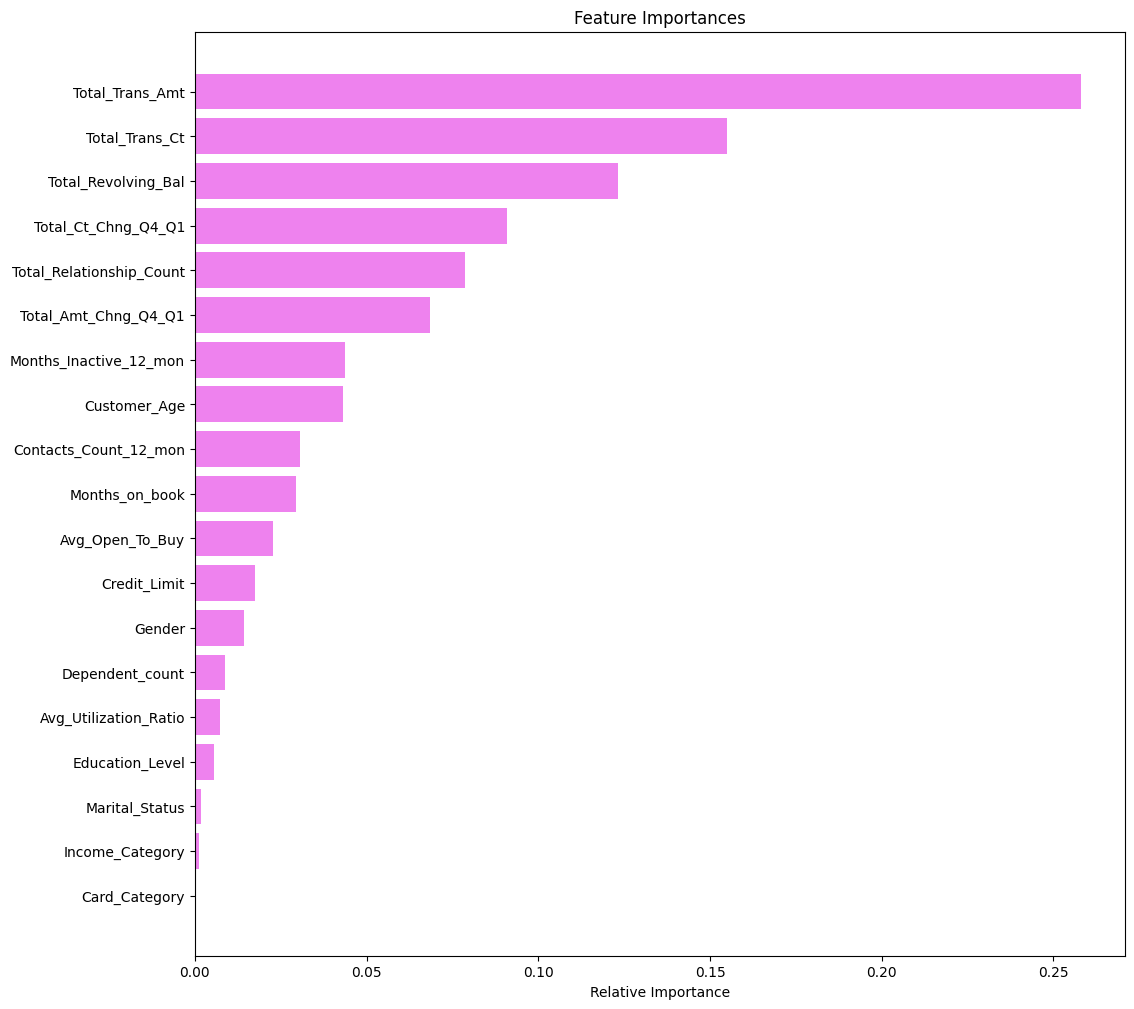

In [431]:
feature_names = X_train.columns
importances = tuned_adb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The Total_Trans_Amt, Total_Trans_Ct, and Total_Revolving_Bal are the most influencial factors for making predictions.

## Business Recommendations

- Customers are likely to churn within the first few months of being a customer. It is important to encourage use and utility of the card during those first months. It may be necessary to invoke an incentive to do so, via rewards or other incentive.

- The two highest influencing predictors of churn are Total Transaction Amount and Total Transaction Count. These two variables are highly related.




***